In [1]:
import os
os.chdir('/Users/ngdnhtien/Research/Codespace/bosonic/bqec@huikhoon')

import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import utility as ut
import constant as constant

%config InlineBackend.figure_formats = ['svg']

# Non-normalizable phase states

I mean when $N\to \infty$...

In [2]:
def phase_state(dim_Fock, phi):
    '''
    Generate a phase state
    '''
    state = 0
    for n in range(dim_Fock):
        state += np.exp( 1j * n *phi ) * qt.fock( dim_Fock, n )
    state = ( 1 / (np.sqrt( 2 * np.pi ) ) ) * state
    
    return state

In [11]:
dim_Fock = 500
phi = constant.pi/4

# Renormalize the state
phase_zero = phase_state(dim_Fock, phi).unit()

# A very slowly decreasing state (in terms of $n$)

In [6]:
def a_very_slowly_decreasing_function(x, n):
    '''
    Generating a slowly decreasing function
    '''
    return np.sqrt(( x**2 - 1 ) / x**2 ) / ( x**n )

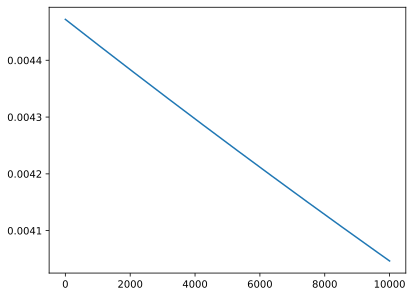

In [7]:
n_list = np.linspace(0, 10000, 10000)
y_list = np.array([a_very_slowly_decreasing_function(x=1.00001, n=n0) for n0 in n_list])

plt.plot(n_list, y_list)

In [8]:
def a_very_slowly_decreasing_state_wrt_n(b, dimFock):
    '''
    Generating a very slowly decrasing state
    '''
    
    if abs(b) > 1:
        the_state = 0
        for n in range(dimFock):
            the_state += (1 / ( b**n )) * qt.fock(dimFock, n)
        the_state = np.sqrt( (b**2 - 1) / b**2 ) * the_state
        
        return the_state
    
    else: 
        raise Exception("Non non! Je veut une abs(b) > 1, si vous plait!")

In [23]:
replicate_state = a_very_slowly_decreasing_state_wrt_n(b=1.1, dimFock=500)

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
qt.plot_wigner(phase_zero, fig=fig, ax=ax1, alpha_max=10)
qt.plot_wigner(replicate_state, fig=fig, ax=ax2, alpha_max=10)
fig.tight_layout()

In [20]:
replicate_state.dag() * replicate_state

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

In [17]:
qt.fidelity(phase_zero, replicate_state)

0.008299186161860587

# Optimal experimentally-friendly state for canonical phase measurement

## A simple coherent state $|\beta\rangle$

\begin{align}
    |\langle \phi | \beta \rangle|^2 = \dfrac{e^{-|\beta|^2}}{2\pi} \left[ \sum_{n,n'=0}^{\infty}\dfrac{e^{i(2\pi k/M-\phi)(n'-n)}\beta^{n'+n}}{\sqrt{(n')!n!}} \right]
\end{align}

Error happens when we measure $k'$ instead of $k$. In other words,

\begin{align}
    p_{err} = \sum_{k'\neq k}^{M-1} \int_{(2k'-1)\pi/M}^{(2k'+1)\pi/M} d\phi\ |\langle \phi | \beta \rangle|^2
\end{align}